# Articulation Robot

Soit une articulation robotique représentée ci-dessous:

<img src="" alt="Image articulation" width=600>

L'articulation est motorisée en son axe de rotation et possède un frottement au sein de l'articulation. Le coefficient de frottement vaut $b=10$.

On demande ce qui suit:

1. Etablir le modèle d'état non-linéaire du système
2. Linéariser le modèle autour du point de fonctionnement $\theta=45\, ^\circ$ et $\dot{\theta}=0\, \mathrm{rad/s}$
3. Discrétiser le système avec une période d'échantillonnage $h=10\, \mathrm{ms}$
4. Calculer les valeurs propres du système discret et en déduire la stabilité
5. Vérifier la gouvernabilité du système et de déterminer la forme canonique de gouvernabilité
6. Vérifier l'observabilité du système et de déterminer la forme canonique d'observabilité

---

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import numpy as np
import scipy.integrate as spint
import control

1. Etablir le modèle d'état non-linéaire du système

L'équation différentielle est obtenue aisément:

$$ J\frac{d\omega}{dt} = C - b\omega - mgl\sin{\theta} $$

En choisissant $x_1=\theta$, $x_2=\omega$, $u=C$, $y_1=\theta$ et $y_2=\omega$, on a:

$$ 
\left\{ \begin{array}{l}
  \dot{x}_1 = x_2 \\
  \dot{x}_2 = -\dfrac{mgl}{J} \sin{x_1} - \dfrac{b}{J}x_2 + \dfrac{1}{J}u \\
  y_1 = x_1 \\
  y_2 = x_2 \\
\end{array} \right. 
$$

Le code suivant permet de simuler l'articulation pour un couple donné:

In [41]:
class Articulation:
    def __init__(self, m, l, b):
        self.m = m
        self.l = l
        self.b = b
        
        self.J = m * l ** 2

    def x_prime(self, t, x, u):
        dx1_dt = x[1]
        dx2_dt = (-self.m * self.l * 9.81 * np.sin(x[0]) - self.b * x[1] + u) / self.J 

        return [dx1_dt, dx2_dt]

In [71]:
artic_robot = Articulation(0.36, 0.451, 10)

t_span = (0, 50)
x_init = [0, 0]

t_eval = np.linspace(t_span[0], t_span[1], 10001)

u = 1.12

In [72]:
sol = spint.solve_ivp(artic_robot.x_prime, t_span, x_init, t_eval=t_eval, args=(u,))

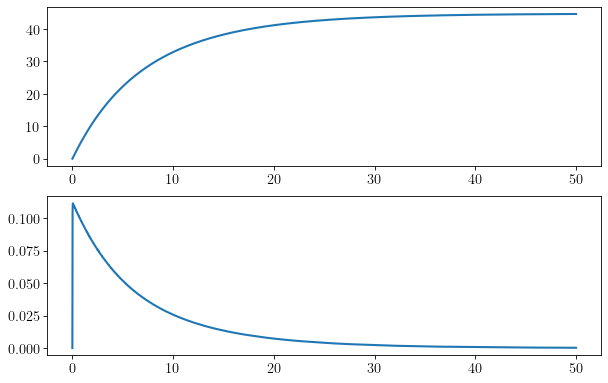

In [75]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(sol.t, sol.y[0] * 180 / np.pi)
axs[1].plot(sol.t, sol.y[1])

---

2. Linéariser le modèle autour du point de fonctionnement $\theta=45\, ^\circ$ et $\dot{\theta}=0\, \mathrm{rad/s}$

En appliquant la linéarisation, on obtient les dérivées partielles suivantes:

\begin{align}
  &\frac{\partial f_1}{\partial x_1} = 0 \qquad \frac{\partial f_1}{\partial x_2} = 1 \qquad \frac{\partial f_1}{\partial u} = 0 \\
  &\frac{\partial f_2}{\partial x_1} = -\frac{mgl}{J} \cos{\bar{x}_1} \qquad \frac{\partial f_2}{\partial x_2} = -\frac{b}{J} \qquad \frac{\partial f_2}{\partial u} = \frac{1}{J} \\
  &\frac{\partial g_1}{\partial x_1} = 1 \qquad \frac{\partial g_1}{\partial x_2} = 0 \qquad \frac{\partial g_1}{\partial u} = 0 \\
  &\frac{\partial g_2}{\partial x_1} = 0 \qquad \frac{\partial g_2}{\partial x_2} = 1 \qquad \frac{\partial g_2}{\partial u} = 0 \\
\end{align}

On obtient alors le modèle d'état continu linéaire suivant:

$$
\left\{ \begin{array}{l}
  \dot{\mathbf{x}} =
  \left[ \begin{array}{cc}
    0 & 1 \\
    -15.38 & -136.57 \\
  \end{array} \right] \mathbf{x} +
  \left[ \begin{array}{c}
    0 \\
    0.1 \\
  \end{array} \right] u \\
  \mathbf{y} =
  \left[ \begin{array}{cc}
    1 & 0 \\
    0 & 1 \\
  \end{array} \right] \mathbf{x} +
  \left[ \begin{array}{c}
    0 \\
    0 \\
  \end{array} \right] u
\end{array} \right.
$$

3. Discrétiser le système avec une période d'échantillonnage $h=10\, \mathrm{ms}$

4. Calculer les valeurs propres du système discret et en déduire la stabilité

5. Vérifier la gouvernabilité du système et de déterminer la forme canonique de gouvernabilité

6. Vérifier l'observabilité du système et de déterminer la forme canonique d'observabilité